In [1]:
import sympy as sy
from sympy import init_printing; init_printing(use_latex = 'mathjax')
import numpy as np
x, l, m, h, W, K = sy.var('x l m hbar W K', real = True)

In [31]:
#Para fines practicos y checar el codigo, se pude omitir esta parte del codigo
n = int(input('Indica el número de funciones:    '))
#Obtención de fi
f = []
for i in range(n):
    fi = input('función %i:   ' %(i+1))
    f.append(fi)
f = sy.Matrix(sy.sympify(f))
H = input('Escribe Hf (usando sy. para los operadores, ejemplo: -(hbar**2/(2*m)) * sy.diff(f, x, 2)):   ') 
#Hamiltoniano aplicado a la matriz de las fi
Hf = eval(H)

Indica el número de funciones:    4
función 1:   x*(l-x)
función 2:   (x**2)*(l-x)**2
función 3:   x*(l-x)*((1*l/2) - x)
función 4:   (x**2)*(l-x)**2*((1*l/2) - x)
Escribe Hf (usando sy. para los operadores, ejemplo: -(hbar**2/(2*m)) * sy.diff(f, x, 2)):   -(hbar**2/(2*m)) * sy.diff(f, x, 2)


In [2]:
f = sy.Matrix([x*(l-x), (x**2)*(l-x)**2, x*(l-x)*((1*l/2) - x), (x**2)*(l-x)**2*((1*l/2) - x)]) #arreglo de fi
Hf = -(hbar**2/(2*m)) * sy.diff(f, x, 2)
ff = f*f.T   #fjfk
In = f*(Hf.T)   #fjHfk
IH = sy.integrate(In, (x, 0, l))     #Hjk
IS = sy.integrate(ff, (x, 0, l))  #Sjk
D = sy.det(IH-IS*W) #Determinante
Wi = sy.solvers.solve(D, W)  #Obtención de raices de W.
W1 = Wi[0]
M = IH-IS*W1

In [3]:
n = 4
def GaJo(M):
    M = sy.Matrix(M)
    #Para Hacer Gauss
    for i in range(n):
        #Encontrar máximo en la columna
        a = sy.N(M[:, i])
        b = sy.Matrix(a.subs([(l, np.random.random()), (hbar, np.random.random()), (m, np.random.random())]))
        c = np.array(b.tolist()).astype(np.float64)
        maxi = abs(c[i])
        maxRow = i
        #intercambiar filas con valores cercanos a 0
        if maxi < 1e-15:       #Apartir de este valor se redondea a 0
            M[i, i] = 0
        #Continua intercambio
        for k in range(i+1, n):
            if abs(c[k]) > maxi:
                maxi = abs(c[k])
                maxRow = k
        if maxi < 1e-15:
            continue
        #Cambiar filas (por valor máximo de columna)
        for k in range(i, n):
            temporal = M[maxRow, k]
            M[maxRow, k] = M[i, k]
            M[i, k] = temporal      
        #Hacer 0 lo valores abajo del máximo de la columna
        for k in range(i+1, n):
            c = -M[k, i]/M[i, i]
            for j in range(n):
                    M[k, j] += c * M[i, j]
    Gauss = sy.Matrix(M)
    # Para hacer Gauss-Jordan
    for t in range(n-1, -1, -1):
        if M[t, t] == 0: continue
        for d in range(t-1, -1, -1):
            cons = M[d, t]/ M[t, t]
            for k in range(n-1, -1, -1):
                M[d, k] -=  M[t, k] * cons
    GJ = sy.Matrix(M)
    for i in range(n):
        if GJ[i, i] == 0: continue
        GJ[i, :] = GJ[i, :] / GJ[i, i]
    #GJ = sy.N(GJ) #mover para fracciones o decimales
    return GJ

In [4]:
C = sy.zeros(n,n) #Matriz de coeficientes
for i in range (1,n+1):
    for j in range (1,n+1):
        C[i-1,j-1]=sy.sympify((str('c_' +str(i) + '_' + str(j))))

In [5]:
def ObMat(Wi, i):
    Wii = Wi[i]
    M = IH-IS*Wii
    return M
def ObC(i):
    Ec = GaJo(ObMat(Wi, i))*C[:, i]
    EcR = Ec.T.row(0).tolist()
    return sy.solvers.solve(EcR[0], C[:, i])

In [6]:
MC = [ObC(i) for i in range(n)]

In [7]:
MCM = C
CC = sy.Matrix(np.zeros(n).tolist())
for i in range(n):
    for j in range(n):
        if C[j, i] in MC[i]:
            MCM[j, i] = MC[i][C[j, i]]
        elif C[j, i] not in MC[i]:
            CC[i] = C[j, i]
MCM = MCM.T
Sum = MCM*f

In [8]:
Norm = [sy.integrate(Sum[i]**2, (x,0,l)) for i in range(n)]
Sol = [sy.solve(Norm[i]-1, CC[i])[1] for i in range(n)]
#sy.N(sy.Matrix(Sol))

In [9]:
Phis = [Sum[i].subs(CC[i], Sol[i]).evalf() for i in range(n)]
Phis

⎡                                  0.5                                    0.5 
⎢                  2           ⎛1 ⎞                        2        2 ⎛1 ⎞    
⎢4.40399751133633⋅l ⋅x⋅(l - x)⋅⎜──⎟    + 4.99034859672658⋅x ⋅(l - x) ⋅⎜──⎟   ,
⎢                              ⎜ 9⎟                                   ⎜ 9⎟    
⎣                              ⎝l ⎠                                   ⎝l ⎠    

                                     0.5                                    0.
                     2           ⎛1 ⎞                        2        2 ⎛1 ⎞  
 - 28.6462005494649⋅l ⋅x⋅(l - x)⋅⎜──⎟    + 132.721876195613⋅x ⋅(l - x) ⋅⎜──⎟  
                                 ⎜ 9⎟                                   ⎜ 9⎟  
                                 ⎝l ⎠                                   ⎝l ⎠  

5                                                 0.5                         
                     2                       ⎛ 1 ⎞                        2   
 , 16.7823521557751⋅l ⋅x⋅(0.5⋅l - x)⋅(l - x)⋅⎜───⎟

In [10]:
#Gauss-Jordan para numpy (puede ser una matriz singular)
A = [[1, -4, 5, -1], [3, -12, 4, -3], [2, -1, 0, 9], [0, 1, 5, -1]]
for i in range(0, n):    #el incide i maneja las filas
    # Search for maximum in this column
    maxEl = abs(A[i][i])
    maxRow = i
    for k in range(i+1, n):
        if abs(A[k][i]) > maxEl:
            maxEl = abs(A[k][i])
            maxRow = k
    # Intercambio de la máxima columna con la actual (una por una)
    for k in range(i, n):
        tmp = A[maxRow][k]
        A[maxRow][k] = A[i][k]
        A[i][k] = tmp
    #Hacer 0 los valores debajo
    for k in range(i+1, n):
        c = -A[k][i]/A[i][i]
        for j in range(n):
                A[k][j] += c * A[i][j]
# Para hacer Gauss-Jordan
xx = np.zeros(n)
for t in range(n-1, -1, -1):
    if A[t][t] == 0:
        continue
    for d in range(t-1, -1, -1):
        xx[t] = A[d][t]/ A[t][t]
        for k in range(n-1, -1, -1):
            A[d][k] -=  A[t][k] * xx[t]

In [11]:
#Ejercicios 8.8, 8.11, 8.14, 8.26, 8.27, 8.57   para 01 de octubre

In [12]:
#8.8 Ver Hojas extra
sy.var('x l m hbar W k', real = True)
ph = (x**k)*(l-x)**k
Hph = -(hbar**2/(2*m)) * sy.diff(ph, x, 2)
pHp = ph*Hph

In [13]:
Inn = sy.simplify(pHp); Inn

  2    2⋅k - 2        2⋅k - 2 ⎛                 2                            2
h̅ ⋅k⋅x       ⋅(l - x)       ⋅⎝2⋅k⋅x⋅(l - x) + x ⋅(-k + 1) + (-k + 1)⋅(l - x) 
──────────────────────────────────────────────────────────────────────────────
                                      2⋅m                                     

⎞
⎠
─
 

In [14]:
sy.simplify(x**(2*k-2) * x)

 2⋅k - 1
x       

In [15]:
WW = (hbar**2/(m * l ** 2)) * ((4 * k**2+k) / (2 * k - 1))
sy.simplify(sy.diff(WW, k, 1))

   2 ⎛   2          ⎞
 h̅ ⋅⎝8⋅k  - 8⋅k - 1⎠
─────────────────────
 2   ⎛   2          ⎞
l ⋅m⋅⎝4⋅k  - 4⋅k + 1⎠

In [16]:
#8.11 Ver hojas para el procedimiento
sy.var('x m hbar a w pi', real = True)
ph = 1 / (a**2 + x**2)
Hph = -(hbar**2/(2*m)) * sy.diff(ph, x, 2) + (1 / 2)  * (m * w ** 2 * x ** 2) * ph
phHph = ph * Hph
Inn = sy.simplify(phHph); Inn

                                            2
    2 ⎛   2      2⎞        2  2  2 ⎛ 2    2⎞ 
- h̅ ⋅⎝- a  + 3⋅x ⎠ + 0.5⋅m ⋅w ⋅x ⋅⎝a  + x ⎠ 
─────────────────────────────────────────────
                            4                
                   ⎛ 2    2⎞                 
                 m⋅⎝a  + x ⎠                 

In [17]:
W = 2*((hbar**2/m *(2 * pi / (32 * a **5))) + m * w ** 2 * (pi / (4 *a))) / (pi / (4 *a **3)); sy.simplify(W)

               2  
   2    2    h̅   
2⋅a ⋅m⋅w  + ──────
               2  
            2⋅a ⋅m

In [18]:
dW = sy.simplify(sy.diff(W, a, 1))
aa = sy.sqrt(hbar / (2 * m * w))

In [19]:
dW

             2 
       2   h̅  
4⋅a⋅m⋅w  - ────
            3  
           a ⋅m

In [20]:
a = aa
W = ((hbar**2/m *(2 * pi / (32 * a **5))) + m * w ** 2 * (pi / (4 *a))) / (pi / (4 *a **3)); sy.simplify(W)

h̅⋅w

In [21]:
#8.14 Ver hojas extra
sy.var('r m hbar c a0 pi q E0', real = True)
phi = sy.exp( - c * r **2 / a0**2);
Hphi = sy.diff(phi, r, 2) + (2 / r)*sy.diff(phi, r, 1)
I = phi * Hphi * r **2

In [22]:
sy.simplify(I)

                                 2 
                           -2⋅c⋅r  
                           ────────
                               2   
     2 ⎛      2        2⎞    a₀    
2⋅c⋅r ⋅⎝- 3⋅a₀  + 2⋅c⋅r ⎠⋅ℯ        
───────────────────────────────────
                  4                
                a₀                 

In [23]:
#8.14 Ver hojas extra
sy.var('r m hbar c a0 pi q E0 Q', real = True)
Y = (1/4) * sy.sqrt(5/sy.pi) * (3 * sy.cos(Q) ** 2 -1)
phi = sy.exp( - c * r **2 / a0**2) * Y;
pQ = (1 / (r ** 2 * sy.sin(Q))) * ((sy.cos(Q) * sy.diff(phi, Q, 1)) + sy.sin(Q) * sy.diff(phi,Q, 2))
Hphi = sy.diff(phi, r, 2) + (2 / r)*sy.diff(phi, r, 1) + pQ
I = phi * Hphi * r ** 2 * sy.sin(Q)

In [24]:
In = sy.simplify(I)

In [25]:
In

                                                                              
                                                                              
                                                                              
                                                                              
      ⎛     2       ⎞ ⎛    4 ⎛       2         ⎞         2    2 ⎛     2       
-1.25⋅⎝3⋅cos (Q) - 1⎠⋅⎝- a₀ ⋅⎝4.5⋅sin (Q) - 3.0⎠ + 1.0⋅a₀ ⋅c⋅r ⋅⎝3⋅cos (Q) - 1
──────────────────────────────────────────────────────────────────────────────
                                                                        4     
                                                                    π⋅a₀      

                                                      2         
                                                -2⋅c⋅r          
                                                ────────        
                                                    2           
⎞      2 ⎛      2          2

In [29]:
#8.26
sy.var('r m hbar V0 W', real = True)
IH = sy.Matrix([[5.753112*V0, -0.31821*V0],[-0.31821*V0, 44.807117*V0]])    #Hjk
IS = sy.Matrix(sy.eye(n))  #Sjk
D = sy.det(IH-IS*W) #Determinante
Wi = sy.solvers.solve(D, W)  #Obtención de raices de W.
W1 = Wi[0]
M = IH-IS*W1
n= 2
C = sy.zeros(n,n) #Matriz de coeficientes
for i in range (1,n+1):
    for j in range (1,n+1):
        C[i-1,j-1]=sy.sympify((str('c_' +str(i) + '_' + str(j))))

In [53]:
Wii = Wi[1]
M = IH-IS*Wii
Ec = (M)*C[:, 1]
sy.solvers.solve(Ec[1], C[0, 1])

[-0.00814740708779199⋅c₂ ₂]

In [23]:
#8.27
import numpy as np
x, l, m, h, W, K = sy.var('x l m hbar W K', real = True)
n = 2

In [24]:
f = sy.Matrix([x**2 * (l-x), x * (l-x)**2]) 
Hf = -(hbar**2/(2*m)) * sy.diff(f, x, 2)
ff = f*f.T   #fjfk
In = f*(Hf.T)   #fjHfk
IH = sy.integrate(In, (x, 0, l))     #Hjk
IS = sy.integrate(ff, (x, 0, l))  #Sjk
D = sy.det(IH-IS*W) #Determinante
Wi = sy.solvers.solve(D, W)  #Obtención de raices de W.
W1 = Wi[0]
M = IH-IS*W1

In [25]:
Wi

⎡    2       2⎤
⎢5⋅h̅   21⋅h̅ ⎥
⎢─────, ──────⎥
⎢  2      2   ⎥
⎣ l ⋅m   l ⋅m ⎦

In [26]:
C = sy.zeros(n,n) #Matriz de coeficientes
for i in range (1,n+1):
    for j in range (1,n+1):
        C[i-1,j-1]=sy.sympify((str('c_' +str(i) + '_' + str(j))))
MC = [ObC(i) for i in range(n)]

In [27]:
MCM = C
CC = sy.Matrix(np.zeros(n).tolist())
for i in range(n):
    for j in range(n):
        if C[j, i] in MC[i]:
            MCM[j, i] = MC[i][C[j, i]]
        elif C[j, i] not in MC[i]:
            CC[i] = C[j, i]
MCM = MCM.T
Sum = MCM*f
Norm = [sy.integrate(Sum[i]**2, (x,0,l)) for i in range(n)]
Sol = [sy.solve(Norm[i]-1, CC[i])[1] for i in range(n)]
#sy.N(sy.Matrix(Sol))
Phis = [Sum[i].subs(CC[i], Sol[i]).evalf() for i in range(n)]
Phis

⎡                                0.5                                   0.5    
⎢                  2         ⎛1 ⎞                                2 ⎛1 ⎞       
⎢5.47722557505166⋅x ⋅(l - x)⋅⎜──⎟    + 5.47722557505166⋅x⋅(l - x) ⋅⎜──⎟   , - 
⎢                            ⎜ 7⎟                                  ⎜ 7⎟       
⎣                            ⎝l ⎠                                  ⎝l ⎠       

                                0.5                                   0.5⎤
                  2         ⎛1 ⎞                                2 ⎛1 ⎞   ⎥
14.4913767461894⋅x ⋅(l - x)⋅⎜──⎟    + 14.4913767461894⋅x⋅(l - x) ⋅⎜──⎟   ⎥
                            ⎜ 7⎟                                  ⎜ 7⎟   ⎥
                            ⎝l ⎠                                  ⎝l ⎠   ⎦

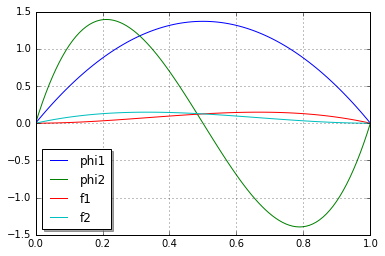

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
p = (sy.Matrix(Phis)).subs([(l, 1)])
lam_x = sy.lambdify(x, p, modules=['numpy'])
xx = np.linspace(0, 1, 100)
y = lam_x(xx)
f1, f2 = xx**2 * (1-xx), xx * (1-xx)**2
plt.plot(xx, y[0][0], label = 'phi1')
plt.plot(xx, y[1][0], label = 'phi2')
plt.plot(xx, f1, label = 'f1')
plt.plot(xx, f2, label = 'f2')
plt.legend(loc='best', shadow=True)
plt.grid()
plt.show()